In [ ]:
!git clone https://github.com/Hotsnown/seminaire-bordeaux-2022.git seminaire &> /dev/null
%pip install nbautoeval &> /dev/null
!git clone https://github.com/chinmusique/outcome-prediction.git &> /dev/null
import pandas as pd
import matplotlib.pyplot as plt
#from seminaire.evaluation.jour4.supervisedlearning.linear_regression import 

# Régression Linéaire

Une introduction aux statistiques

### I. Import

In [ ]:
import pandas as pd
df = pd.read_csv("préavis2.csv")

#TODO: Quelles sont les colonnes de ce dataset ?

### II. Régression linéaire à une variable


In [ ]:
#Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(df['Durée de la relation (en mois)'], df['Durée raisonnable'])

#Légendes
plt.xlabel("Durée de la relation (en mois)", fontsize = 12)
plt.ylabel("Durée Préavis", fontsize = 12)
plt.title("Relation entre la durée de la relation et la durée raisonnable de préavis")

plt.show()

La façon la plus simple de prédire le résultat d'une décision de justice en matière de rupture brutale - sans utiliser aucune autre variable - est de prendre la durée moyenne jugée raisonnable par les magistrats :


In [ ]:
baseline = df['Durée raisonnable'].mean()
print (baseline)

Disons que la moyenne est de 8.7.

Si je veux prédire la durée raisonnable  de préavis, je dis simplement qu'elle doit être de 8,7 mois, indépendamment de tous les autres facteurs qui influent sur le caractère raisonnable.

Cette moyenne simple est appelée baseline (car si vous la placez dans un graphique, elle sera une ligne droite, indépendamment de toute autre variable) :

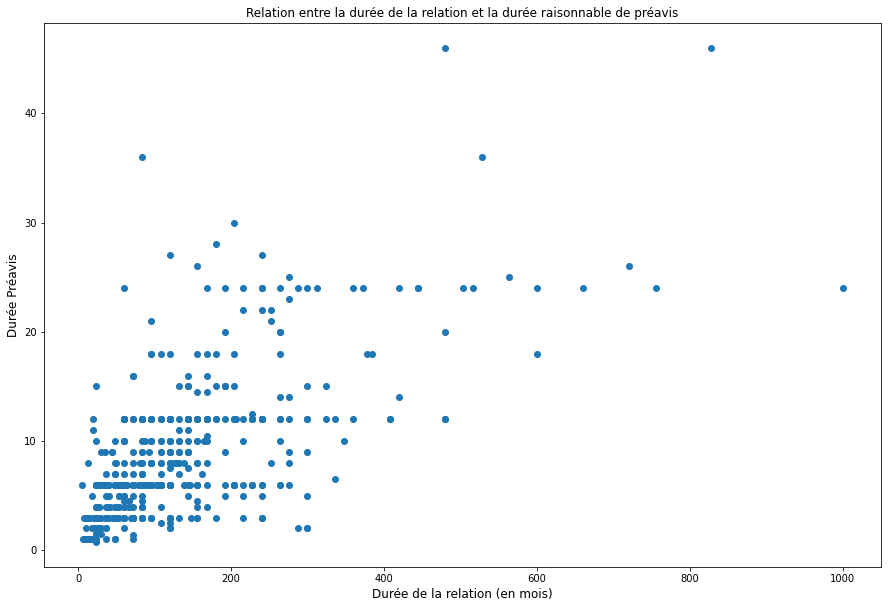

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
plt.scatter(df['Durée de la relation (en mois)'], df['Durée raisonnable'])
plt.hlines(baseline, 0, 800, color = 'red', label="Baseline")

plt.xlabel("Durée de la relation (en mois)", fontsize = 30)
plt.ylabel("Durée Préavis", fontsize = 30)
plt.title("Relation entre la durée de la relation et la durée raisonnable de préavis")

plt.show()

Comme vous pouvez le constater, dans cet exemple, la ligne de base ne prédit jamais la valeur correcte, s'en rapproche seulement quelques fois mais - pire encore - ne suit pas du tout la tendance : si la température est inférieure ou supérieure à la moyenne, cela n'a aucune importance.

Voyons maintenant un modèle statistique plus sophistiqué : le modèle de régression linéaire et voyons s'il est meilleur que notre modèle de base.

La régression linéaire est l'un (un simple) des algorithmes d'apprentissage supervisé faisant partie de l'apprentissage automatique.

L'apprentissage supervisé signifie que des exemples avec les bonnes réponses (labels) sont utilisés pour construire (ou former) le modèle qui extrapole et prédit ensuite les résultats en fonction de différentes entrées. L'apprentissage non supervisé se fait sans données étiquetées au préalable.

Dans notre cas, nous disposons de données étiquetées : la durée jugée raisonnable par les magistrats. L'idée est de "former" notre modèle sur ces exemples afin qu'il soit capable de prédire les décisions futures.

#### A. Le modèle de régression linéaire

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import math
from scipy import stats

Le modèle de régression de base est le modèle de régression à variable unique, où la variable indépendante - x - est unique :

$$y=\beta_0+\beta_1⋅x$$

Le but de la régression linéaire est de créer une ligne prédictive à travers les données.
- Bêta0 et Bêta1 sont des coefficients spécialement sélectionnés.
- Bêta0 = intercept de la ligne
- Bêta1 = pente de la ligne

Voyons un exemple, en utilisant comme variable indépendante x la durée de la relation :
- y = durée jugée raisonnable de préavis
- x = durée de la relation

Cela signifie que la durée jugée raisonnable augmentera / diminuera linéairement en fonction de l'augmentation / diminution de la durée de la relation. Voyons à quoi ressemblerait la relation avec y = 1/12 * x - 0 (coefficients bêta choisis arbitrairement, juste pour suivre plus ou moins la tendance) :

In [ ]:
import numpy as np
x = np.linspace(0, 800, 10)  
y = (1/12) * x - 0
plt.figure(figsize=(40, 20))
plt.scatter(df['Durée de la relation (en mois)'], df['Durée raisonnable'])
plt.hlines(baseline, 0, 800, color = 'red', label="Baseline")

plt.plot(x,y, label="Régression Linéaire Simple")
plt.legend(loc="upper left")
plt.xlabel("Durée de la relation (en mois)", fontsize = 30)
plt.ylabel("Durée Préavis", fontsize = 30)
plt.title("Relation entre la durée de la relation et la durée raisonnable de préavis",  fontsize = 30)
plt.grid()
plt.show()

TODO: Quelle est la ligne qui correspond le mieux aux données ?<br/>
TODO: La fonction y = 1/12 * x - 0 n'a pas été choisie au hasard. Quelle est sa signification?<br/>

### B. Comment trouver le meilleur modèle

La simple ligne bleue semble meilleure que la ligne de base, mais l'est-elle vraiment ?<br/>
Et existe-t-il de meilleurs modèles ?<br/>
Comment mesurer l'"adéquation" d'un modèle ?<br/>

Chaque modèle fait des erreurs.<br/>

Nous pouvons représenter la relation entre les observations et les prédictions comme suit :<br/>

$$y_i=\beta_0+\beta_1⋅x_i+\varepsilon_i$$

$$ \beta_0 $$= variable dépendante (durée jugée raisonnable) pour la i-ème observation (Cible).<br/>


$$ \beta_1 $$ = Variable indépendante (durée de la relation) pour la i-ème observation (Caractéristiques).<br/>


$$ \varepsilon_i $$ = terme d'erreur pour la i-ème observation (Résidu).<br/>


Ces résidus sont la clé pour mesurer la qualité d'un modèle et pour comparer les modèles entre eux. Voyons un exemple lié au premier point de données :

In [ ]:
df.iloc[0]


la durée de la relation était de 48 mois pour cette décision, et la durée jugée raisonnable est de 6 mois.



In [ ]:
durée_raisonnable_2017 = df.iloc[0]["Durée raisonnable"]
durée_raisonnable_2017


In [ ]:
durée_relation_2017 = df.iloc[0]["Durée de la relation (en mois)"]
durée_relation_2017

Le modèle simple y=(1/12) * x - 0 prédirait pour une durée de la relation de 48 mois une durée raisonnable de 4 mois :



In [ ]:
durée_prédite = (1/12) * durée_relation_2017 - 0; print (durée_prédite)
durée_prédite

La différence entre la valeur réelle (6 mois) et la valeur prédite (4 mois) est le résidu.



In [ ]:
durée_raisonnable_2017 - durée_prédite


Le premier point de données est alors représenté par cette formule incluant les tracés résiduels :

$$y_1=-0+(1/12)*⋅x_1+2$$

#### C. Traces Résiduelles

Traçons les résidus liés à cette ligne de régression simple, c'est-à-dire les lignes verticales qui séparent le point réel du point prédit.



In [ ]:
y_bottom = 0
y_top = 60
y_range = y_top - y_bottom

plt.figure(figsize=(40, 20))

plt.ylim(y_bottom, y_top)
plt.scatter(df["Durée de la relation (en mois)"], df["Durée raisonnable"]) # the actual points
plt.plot(x,y, label="Simple Regression Linéaire") # the regression line

# now let's plot the residuals
for i in range(0, len(df)):
    # first we need the coordinates of the actual point
    x_point = df["Durée de la relation (en mois)"][i]
    y_point = df["Durée raisonnable"][i]
    # then we need the say how long is the vertical line
    # the vertical line must be between 0 and 1
    y1 = (y_point - y_bottom) / y_range  # scale
    y2 = (((1/12) * x_point - 0) - y_bottom) / y_range  # scale
    # now we can plot the vertical RED residual line
    plt.axvline(x_point, ymin=y1, ymax=y2, color="red") 

plt.xlabel("Durée de la relation (en mois)", fontsize = 30)
plt.ylabel("Durée Préavis", fontsize = 30)
plt.title("Relation entre la durée de la relation et la durée raisonnable de préavis",  fontsize = 30)
plt.grid()

Les résidus sont les lignes verticales rouges



TODO : Quelle est le problème de l'heuristique y = (1/12) * x ?

1. Jour 1
    * Variables
        * [exercice1](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/1.%20variables/1.1%20helloworld.ipynb)
        * [exercice2](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/1.%20variables/1.2%20%C3%A9viter%20les%20errreurs%20de%20nommage.ipynb)
        * [mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/1.%20variables/1.3%20mini-project.ipynb#scrollTo=RPB2xCMdA6lV)
    * Strings
        * [exercice1](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/2.%20strings/2.1%20concat.ipynb)
        * [exercice2](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/2.%20strings/2.2%20string_methods.ipynb)
        * [mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/2.%20strings/2.3%20mini-project.ipynb)
    * Opérations
        * [exercice1](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/3.%20operations/3.1%20math.ipynb)
        * [exercice2](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/3.%20operations/3.2%20bool%C3%A9en.ipynb)
        * [mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/3.%20operations/3.3%20mini-project.ipynb)

2. Jour 2
    * Listes
        * [Définition](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.1%20Listes/2.1.1%20d%C3%A9finition%20liste.ipynb?hl=fr)
        * [Strings et listes](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.1%20Listes/2.1.2%20String%20as%20list%20of%20characters.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.1%20Listes/2.1.3%20mini-project.ipynb?hl=fr)
    * Fonctions
        * [Définition I](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.2%20Fonctions/2.2.1%20d%C3%A9finition%20fonctions.ipynb?hl=fr)
        * [Définition II](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.2%20Fonctions/2.2.2%20scope%20et%20fonctions%20imbriqu%C3%A9es.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.2%20Fonctions/2.2.3%20mini-project.ipynb?hl=fr) 
    * Librairies
        * [Pandas](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.3%20Librairies/2.3.1%20Pandas.ipynb?hl=fr)
        * [Matplotlib](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.3%20Librairies/2.3.2%20Matplotlib.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.3%20Librairies/2.3.3%20mini-project.ipynb?hl=fr) 
3. Jour 3
    * Introduction à la NLP
        * [Charger des un corpus](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.1%20what%20is%20nlp/3.1.1%20Accessing%20Text.ipynb?hl=fr)
        * [Traitement de texte dans Pandas](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.1%20what%20is%20nlp/3.1.2%20Working%20with%20text%20data%20in%20pandas.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.1%20what%20is%20nlp/3.1.3%20mini-project.ipynb?hl=fr)
    * Segmentation
        * [Segmentation de tokens](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.2%20Segmentation/3.2.1%20Token%20segmentation.ipynb?hl=fr)
        * [Segmentation de phrase](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.2%20Segmentation/3.2.2%20Sentence%20segmentation.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.2%20Segmentation/3.2.3%20mini-project.ipynb?hl=fr)
    * Nettoyage de texte
        * [Stopwords](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.3%20text%20cleaning.ipynb/3.3.1%20stopwords.ipynb?hl=fr)
        * [Normalisation](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.3%20text%20cleaning.ipynb/3.3.2%20Normalizing%20Text.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.3%20text%20cleaning.ipynb/3.3.3%20mini-project.ipynb?hl=fr)
4. Jour 4
    * Apprentissage supervisé
        * [Régression linéaire](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.1%20supervised%20learning/4.3.1%20linear%20regression.ipynb?hl=fr)
        * [Evaluation](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.1%20supervised%20learning/4.3.2%20evaluale.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.1%20supervised%20learning/4.3.3%20mini-project.ipynb?hl=fr)
    * Pré-traitement de texte
        * [Featurization de textes](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.2%20text%20preprocessing/4.2.1%20text%20featurization.ipynb?hl=fr)
        * [Featurization de labels](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.2%20text%20preprocessing/4.2.2%20label%20featurization.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.2%20text%20preprocessing/4.2.3%20mini-project.ipynb?hl=fr)
    * Classification de texte
        * [EDA](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.3%20text%20classification/4.1.1%20EDA.ipynb?hl=fr)
        * [Apprentissage supervisé textuel](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.3%20text%20classification/4.1.1%20EDA.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.3%20text%20classification/4.1.3%20mini-project.ipynb?hl=fr)
5. Jour 5
    * [Projet final](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour5/final-project.ipynb?hl=fr)